In [30]:
import pandas as pd
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import io

In [38]:
data = pd.read_csv('/content/ph_cities_dissimilarity_matrix.csv',index_col=0)
data.head()

,Manila,Cebu City,Davao City,Quezon City,Taguig,Makati,Iloilo City,Zamboanga City,Cagayan de Oro,Antipolo,Bacolod City,Tagbilaran City
City,,,,,,,,,,,,
Manila,0,550,980,20,10,10,710,1140,780,40,510,740
Cebu City,550,0,960,570,560,550,130,1300,800,590,120,270
Davao City,980,960,0,960,950,940,820,390,170,1030,870,1050
Quezon City,20,570,960,0,5,5,700,1150,770,30,500,730
Taguig,10,560,950,5,0,5,710,1140,780,40,510,740


In [17]:
print("Row Index:", data.index.tolist())
print("Column Headers:", data.columns.tolist())

aligned_cities = data.index.intersection(data.columns)
data_aligned = data.loc[aligned_cities, aligned_cities]

print("Aligned Matrix Shape:", data_aligned.shape)
if data_aligned.shape[0] == data_aligned.shape[1]:
    print("The matrix is now square!")
else:
    print("Matrix is still not square. Check for data issues.")

print("Final Square Dissimilarity Matrix:")
print(data_aligned)

Row Index: [0, 550, 980, 20, 10, 10, 710, 1140, 780, 40, 510, 740]
Column Headers: ['Cebu City', 'Davao City', 'Quezon City', 'Taguig', 'Makati', 'Iloilo City', 'Zamboanga City', 'Cagayan de Oro', 'Antipolo', 'Bacolod City', 'Tagbilaran City']
Aligned Matrix Shape: (0, 0)
The matrix is now square!
Final Square Dissimilarity Matrix:
Empty DataFrame
Columns: []
Index: []


In [18]:
data.set_index(data.columns[0], inplace=True)

print("Final Square Dissimilarity Matrix:")
print(data)

Final Square Dissimilarity Matrix:
           Davao City  Quezon City  Taguig  Makati  Iloilo City  \
Cebu City                                                         
550               980           20      10      10          710   
0                 960          570     560     550          130   
960                 0          960     950     940          820   
570               960            0       5       5          700   
560               950            5       0       5          710   
550               940            5       5       0          700   
130               820          700     710     700            0   
1300              390         1150    1140    1140         1470   
800               170          770     780     780         1030   
590              1030           30      40      40          650   
120               870          500     510     510          120   
270              1050          730     740     740          330   

           Zamboanga City 

In [20]:
dissimilarity_matrix = data_aligned.to_numpy()

print("Dissimilarity Matrix as NumPy Array:")
print(dissimilarity_matrix)

if np.allclose(dissimilarity_matrix, dissimilarity_matrix.T, atol=1e-8):
    print("The matrix is symmetric.")
else:
    print("The matrix is not symmetric. Check your data.")

Dissimilarity Matrix as NumPy Array:
[]
The matrix is symmetric.


In [22]:
dissimilarity_matrix = data.to_numpy()

print("Dissimilarity Matrix as NumPy Array:")
print(dissimilarity_matrix)


Dissimilarity Matrix as NumPy Array:
[[ 980   20   10   10  710 1140  780   40  510  740]
 [ 960  570  560  550  130 1300  800  590  120  270]
 [   0  960  950  940  820  390  170 1030  870 1050]
 [ 960    0    5    5  700 1150  770   30  500  730]
 [ 950    5    0    5  710 1140  780   40  510  740]
 [ 940    5    5    0  700 1140  780   40  510  740]
 [ 820  700  710  700    0 1470 1030  650  120  330]
 [ 390 1150 1140 1140 1470    0  580 1160 1040 1250]
 [ 170  770  780  780 1030  580    0  830  390  750]
 [1030   30   40   40  650 1160  830    0  510  740]
 [ 870  500  510  510  120 1040  390  510    0  190]
 [1050  730  740  740  330 1250  750  740  190    0]]


In [32]:
print("Row Index:", data.index.tolist())
print("Column Headers:", data.columns.tolist())

Row Index: [550, 0, 960, 570, 560, 550, 130, 1300, 800, 590, 120, 270]
Column Headers: ['Davao City', 'Quezon City', 'Taguig', 'Makati', 'Iloilo City', 'Zamboanga City', 'Cagayan de Oro', 'Antipolo', 'Bacolod City', 'Tagbilaran City']


In [34]:
aligned_cities = data.index.intersection(data.columns)
data_aligned = data.loc[aligned_cities, aligned_cities]

print("Aligned Matrix Shape:", data_aligned.shape)
if data_aligned.shape[0] == data_aligned.shape[1]:
    print("The matrix is now square!")
else:
    print("Matrix is still not square. Check for data issues.")

Aligned Matrix Shape: (0, 0)
The matrix is now square!


In [35]:
print("Final Square Dissimilarity Matrix:")
print(data_aligned)


Final Square Dissimilarity Matrix:
Empty DataFrame
Columns: []
Index: []


In [36]:
dissimilarity_matrix = data_aligned.to_numpy()

if np.allclose(dissimilarity_matrix, dissimilarity_matrix.T, atol=1e-8):
    print("The matrix is symmetric.")
else:
    print("The matrix is not symmetric. Check your data.")

The matrix is symmetric.


In [40]:
aligned_cities = data.index.intersection(data.columns)


if aligned_cities.empty:
    print("Error: No common cities found between index and columns.")

    print("Index:", data.index)
    print("Columns:", data.columns)
else:
    data_aligned = data.loc[aligned_cities, aligned_cities]
    dissimilarity_matrix = data_aligned.to_numpy()


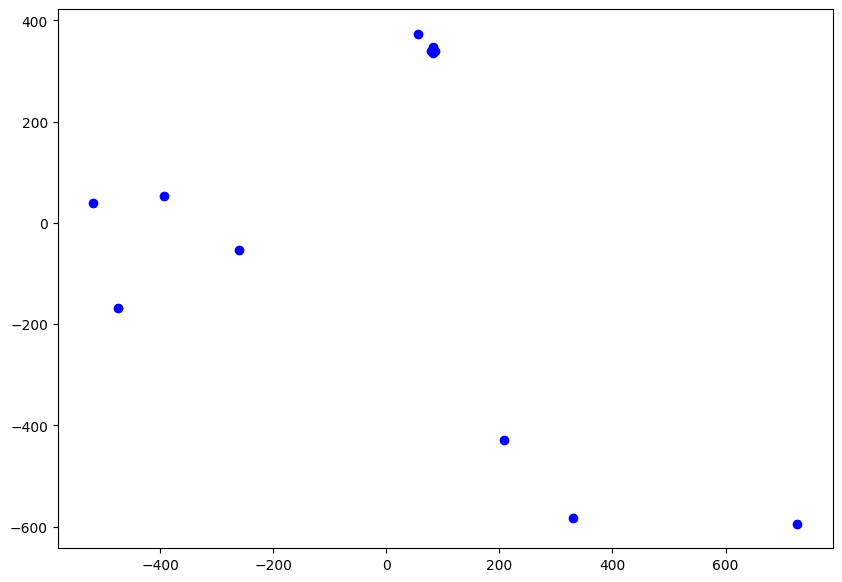

In [41]:
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_results = mds.fit_transform(dissimilarity_matrix)

mds_df = pd.DataFrame(mds_results, columns=['Dimension 1', 'Dimension 2'], index=data_aligned.index)

plt.figure(figsize=(10, 7))
plt.scatter(mds_df['Dimension 1'], mds_df['Dimension 2'], color='blue')

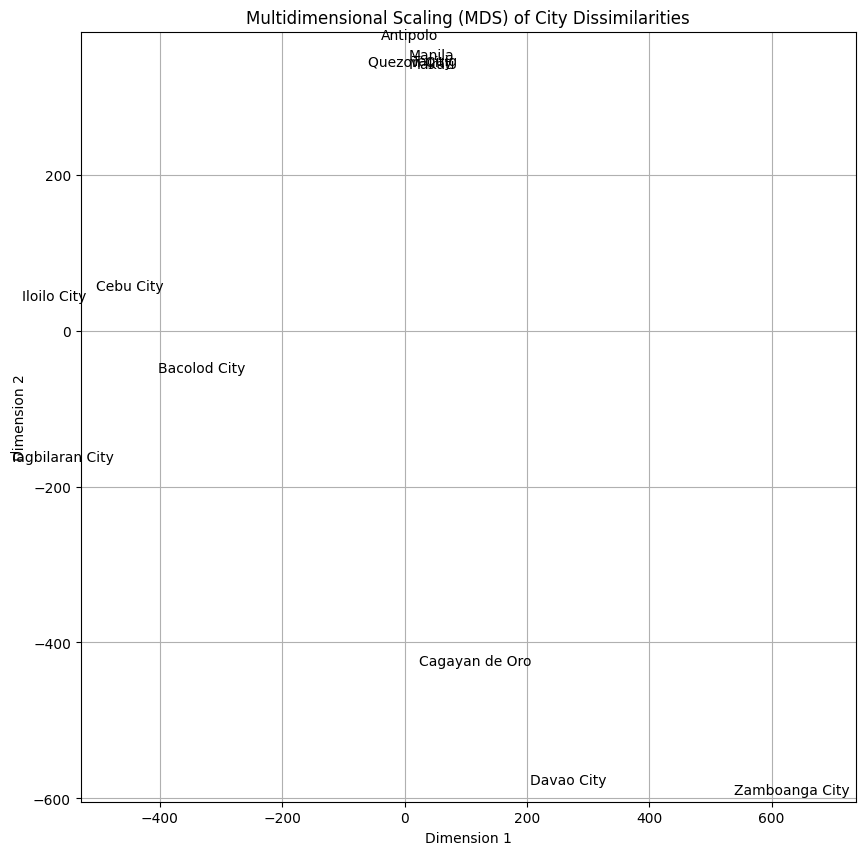

In [48]:
for city, (x, y) in mds_df.iterrows():
    plt.text(x, y, city, fontsize=10, ha='right')

plt.title("Multidimensional Scaling (MDS) of City Dissimilarities")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)

plt.gcf().set_size_inches(10, 10)

plt.xlim(mds_df['Dimension 1'].min() - 10 , mds_df['Dimension 1'].max() + 10)
plt.ylim(mds_df['Dimension 2'].min() - 10, mds_df['Dimension 2'].max() + 10)


plt.show()

In [45]:
print("MDS Coordinates:")
print(mds_df)

MDS Coordinates:
                 Dimension 1  Dimension 2
Manila             81.873081   347.594643
Cebu City        -394.436062    52.180756
Davao City        329.610207  -582.527544
Quezon City        78.454603   339.173477
Taguig             86.087967   339.691732
Makati             82.692008   336.398341
Iloilo City      -519.337840    38.745048
Zamboanga City    727.361171  -594.259489
Cagayan de Oro    207.321721  -428.926650
Antipolo           55.843207   373.493982
Bacolod City     -260.382672   -53.600986
Tagbilaran City  -475.087392  -167.963310


The cities that are closests to each other are **Quezon City**, **Taguig** and **Makati**

The cities that has the highest dissimilarity is **Antipolo** and **Zamboanga**

Clusters


*   Cluster 1: Manila, Quezon City, Taguig, Makati, Antipolo, Bacolod City — These cities are geographically and functionally closer to each other.
*   Cluster 2: Cebu City, Iloilo City, Tagbilaran City — These cities are positioned near each other but somewhat distanced from the first group.
*   Cluster 3: Zamboanga City, Davao City, Cagayan de Oro — These cities appear farther from the main cluster, indicating higher dissimilarity.

**Cebu City** has coordinates (-394.44, 52.18), meaning it is positioned distinctly compared to Manila, which has coordinates (81.87, 347.59).

**Zamboanga City** with coordinates (727.36, -594.26) is far from the rest of the cities, indicating that it has a high dissimilarity compared to the other cities.




In [49]:
city_coordinates = {
    "Manila": [14.5995, 120.9842],
    "Cebu City": [10.3157, 123.8854],
    "Davao City": [7.1907, 125.4553],
    "Quezon City": [14.6760, 121.0437],
    "Taguig": [14.5449, 121.0509],
    "Makati": [14.5547, 121.0244],
    "Iloilo City": [10.7202, 122.5621],
    "Zamboanga City": [6.9213, 122.0787],
    "Cagayan de Oro": [8.4542, 124.6319],
    "Antipolo": [14.6200, 121.1820],
    "Bacolod City": [10.6764, 122.9568],
    "Tagbilaran City": [9.6466, 123.8504]
}

coordinates_df = pd.DataFrame.from_dict(city_coordinates, orient='index', columns=['Latitude', 'Longitude'])

coordinates_df.head()


,Latitude,Longitude
Manila,14.5995,120.9842
Cebu City,10.3157,123.8854
Davao City,7.1907,125.4553
Quezon City,14.6760,121.0437
Taguig,14.5449,121.0509


In [50]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return distance

geographical_dist_matrix = pd.DataFrame(index=coordinates_df.index, columns=coordinates_df.index)

for city1 in coordinates_df.index:
    for city2 in coordinates_df.index:
        lat1, lon1 = coordinates_df.loc[city1, 'Latitude'], coordinates_df.loc[city1, 'Longitude']
        lat2, lon2 = coordinates_df.loc[city2, 'Latitude'], coordinates_df.loc[city2, 'Longitude']
        geographical_dist_matrix.loc[city1, city2] = haversine(lat1, lon1, lat2, lon2)

geographical_dist_matrix.head()

,Manila,Cebu City,Davao City,Quezon City,Taguig,Makati,Iloilo City,Zamboanga City,Cagayan de Oro,Antipolo,Bacolod City,Tagbilaran City
Manila,0.0,571.025344,957.41781,10.645958,9.401348,6.597818,464.071969,862.094263,790.385295,21.404918,485.883861,632.721149
Cebu City,571.025344,0.0,387.949084,574.621673,561.993325,564.479799,151.502086,426.499027,222.600319,561.406808,109.162805,74.49919
Davao City,957.41781,387.949084,0.0,961.445786,948.516379,950.918354,504.956251,373.818279,167.230364,948.579873,474.895155,325.167224
Quezon City,10.645958,574.621673,961.445786,0.0,14.598226,13.646868,469.678238,869.649841,794.515955,16.128921,490.75732,636.995072
Taguig,9.401348,561.993325,948.516379,14.598226,0.0,3.053246,455.789248,855.097974,781.513841,16.394268,477.272108,623.893281


In [51]:
dissimilarity_matrix = geographical_dist_matrix

dissimilarity_matrix = dissimilarity_matrix.to_numpy()


mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_coords = mds.fit_transform(dissimilarity_matrix)

mds_df = pd.DataFrame(mds_coords, index=geographical_dist_matrix.index, columns=['Dimension 1', 'Dimension 2'])


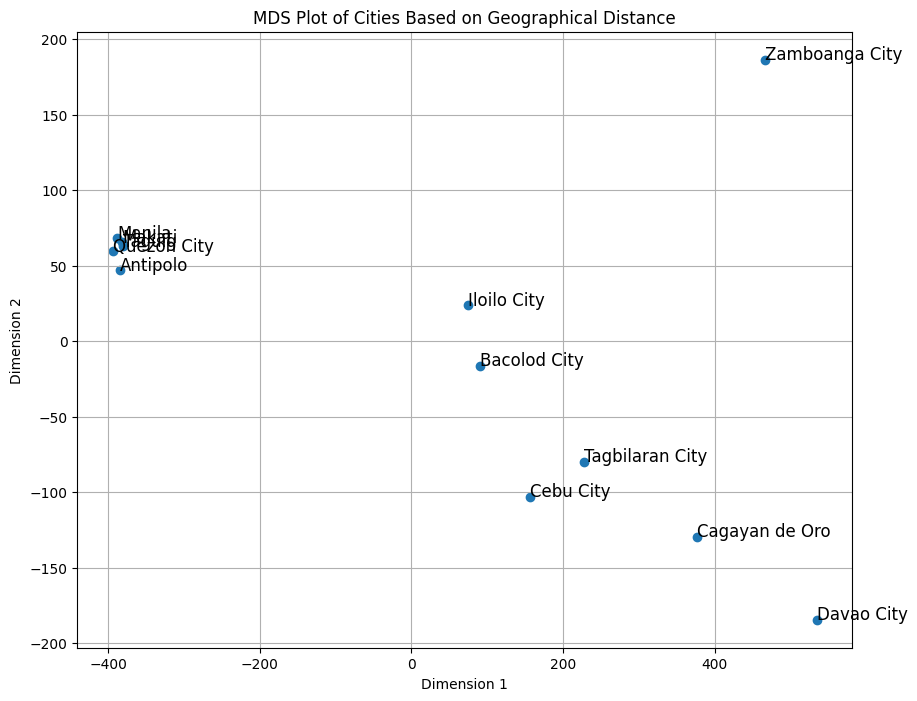

In [52]:
plt.figure(figsize=(10, 8))
plt.scatter(mds_df['Dimension 1'], mds_df['Dimension 2'])


for city, (x, y) in mds_df.iterrows():
    plt.text(x, y, city, fontsize=12)

plt.title('MDS Plot of Cities Based on Geographical Distance')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()

Similar Cities


*   **Manila**, **Makati**, **Quezon City**, and **Antipolo** are clustered closely together in both plots. This indicates that they are highly similar, likely due to their geographical proximity, being part of Metro Manila, and sharing economic, cultural, and infrastructural ties.
*  **Cebu City** and **Tagbilaran City** are positioned relatively closer to each other in both visualizations, suggesting similarity, likely due to their regional proximity in the Visayas region.


Distinct Cities


*   **Zamboanga City** and **Davao City** appear isolated from the main clusters. These cities are geographically located in the Mindanao region, far from the more closely grouped cities in Luzon and Visayas. Their distance in the MDS plot highlights their distinct geographic separation and possibly cultural or economic differences.
*   **Cagayan de Oro** is also relatively distinct but somewhat closer to Davao compared to the Luzon cluster



Geographic Patterns


*   Cities in **Luzon** cluster together (Manila, Makati, Quezon City, Antipolo).
*   Cities in the **Visayas** (Cebu, Bacolod, Iloilo, Tagbilaran) form a secondary group but are more spread out.
*   **Mindanao** cities (Davao, Zamboanga, Cagayan de Oro) are positioned farthest from the Luzon cluster.




**Factors Explaining the Patterns:**

Geographic Proximity


*   The primary factor driving the clustering is likely the cities' geographical locations. Metro Manila cities are highly connected, while cities in the Visayas and Mindanao regions are more isolated due to natural barriers like bodies of water.


Cultural and Historical Connections


*   Cities in Luzon share common cultural traits due to their historical roles in governance, trade, and development.
*   Visayan cities like Cebu, Iloilo, and Bacolod share similar cultural and linguistic traits, contributing to their closeness.




Economic and Infrastructure Similarities



*   Cities in Metro Manila (Makati, Quezon City, Manila) are centers of commerce and infrastructure, making them appear more similar.
*  Davao and Zamboanga's separation can be attributed to their more independent economic roles as major hubs in Mindanao.


